<img style="float: right;" src="meetup_logo.svg" width=200>

# Meetup - Exploratory Data Analysis

<i>Exploring the contents of meetup data.</i>

<u>We'll look at:</u>
1. Events
2. Groups
3. Members

***

### Import Libraries

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
import pickle
import json
import time
import datetime
%matplotlib inline

***
### Events

#### Where are events being held in New York City?

We can see that majority of events in NYC are held in Manhattan, tappering off north of Midtown, and with some notable hotpots in Long Island City in Queens and Dumbo in Brooklyn. Not surprising since these are the most popular areas of NYC.

In [2]:
# first, let's get a map of NYC
nyc_map = folium.Map(location=[40.7128, -74.0060],
                    zoom_start = 11,
                    tiles = 'cartodbpositron') # Uses lat then lon. The bigger the zoom number, the closer in you get

In [23]:
# convert json to dataframe
sep18_events = pd.read_json('all_past_events_cleaned.json')

In [24]:
sep18_events.head()

,created,description,duration_min,event_url,fee,headcount,id,maybe_rsvp_count,name,photo_url,...,yes_rsvp_count,venue_neighborhood,venue_latlon,venue_country,venue_id,group_id,time_m_d_y,day_of_week,subway_distances,num_close_subways
0,08/27/2018 17:36:07,Join us in person or tune in online! Livestrea...,120,https://www.meetup.com/Build-with-Code-New-Yor...,0.0,0,254149786,0,"JavaScript The Easier Parts: Objects, Function...",None,...,42,Gramercy Park,"[40.723171, -73.997177]",United States,25315570,21993357,1536019200000,Tuesday,"[0.0601408266, 0.084601256, 0.1554775319, 0.23...",12
1,08/27/2018 15:59:07,Get started now on challenges related to these...,150,https://www.meetup.com/Build-with-Code-New-Yor...,0.0,0,254146381,0,Online Only JavaScript - The Hard Parts: Itera...,None,...,64,Gramercy Park,"[40.74673, -73.98967]",United States,25626092,21993357,1536192000000,Thursday,"[0.0995955729, 0.1962967492, 0.2157054423, 0.2...",9
10,09/10/2018 15:59:35,Please tune into the stream here: https://zoom...,120,https://www.meetup.com/Build-with-Code-New-Yor...,0.0,0,254557663,0,Codesmith Online Info Session (Online Only),None,...,17,Gramercy Park,"[40.74673, -73.98967]",United States,25626092,21993357,1537228800000,Tuesday,"[0.0995955729, 0.1962967492, 0.2157054423, 0.2...",9
100,08/10/2018 16:32:36,Note: this event will be Livestreamed here: ht...,60,https://www.meetup.com/Metis-New-York-Data-Sci...,0.0,0,253681510,0,Livestream: Virtual Bootcamp Info Session,https://secure.meetupstatic.com/photos/event/7...,...,26,None,"[0.0, 0.0]",None,25275809,15473572,1536105600000,Wednesday,"[5371.1747539342, 5371.4307531791, 5371.722346...",0
1000,09/19/2018 23:27:16,Free Admission exclusively for this meetup gro...,165,https://www.meetup.com/freethingstodoinnyc/eve...,0.0,0,254833557,0,"FREE TIX, NO Drink min at Black Cat Cafe Comed...",https://secure.meetupstatic.com/photos/event/b...,...,9,Gramercy Park,"[40.719128, -73.98451]",United States,18325152,1192681,1537488000000,Friday,"[0.1632480956, 0.19208232520000001, 0.40987453...",6


In [25]:
sep18_events.dtypes

created                object
description            object
duration_min            int64
event_url              object
fee                   float64
headcount               int64
id                     object
maybe_rsvp_count        int64
name                   object
photo_url              object
rating                 object
rsvp_limit             object
status                 object
time                    int64
updated                object
visibility             object
waitlist_count          int64
yes_rsvp_count          int64
venue_neighborhood     object
venue_latlon           object
venue_country          object
venue_id                int64
group_id                int64
time_m_d_y              int64
day_of_week            object
subway_distances       object
num_close_subways       int64
dtype: object

In [26]:
# need to reconvert the 'time_m_d_y' column to human-readable datetime format
sep18_events['time_m_d_y'] = pd.to_datetime(sep18_events['time_m_d_y'], unit='ms')

In [27]:
sep18_events['time_m_d_y']

0       2018-09-04
1       2018-09-06
10      2018-09-18
100     2018-09-05
1000    2018-09-21
10000   2018-09-03
10001   2018-09-05
10002   2018-09-06
10003   2018-09-07
10004   2018-09-08
10005   2018-09-08
10006   2018-09-09
10007   2018-09-12
10008   2018-09-13
10009   2018-09-13
1001    2018-09-22
10010   2018-09-14
10011   2018-09-14
10012   2018-09-14
10013   2018-09-15
10014   2018-09-15
10015   2018-09-16
10016   2018-09-16
10017   2018-09-16
10018   2018-09-20
10019   2018-09-20
1002    2018-09-23
10020   2018-09-21
10021   2018-09-21
10022   2018-09-22
           ...    
9972    2018-09-02
9973    2018-09-09
9974    2018-09-16
9975    2018-09-23
9976    2018-09-02
9977    2018-09-09
9978    2018-09-16
9979    2018-09-23
998     2018-09-20
9980    2018-09-29
9981    2018-09-18
9982    2018-09-15
9983    2018-09-28
9984    2018-09-05
9985    2018-09-05
9986    2018-09-12
9987    2018-09-12
9988    2018-09-19
9989    2018-09-19
999     2018-09-21
9990    2018-09-26
9991    2018

In [28]:
# turn series into a list and remove any coordinates that contain 0
list_latlon = list(sep18_events['venue_latlon'])
list_latlon = [l for l in list_latlon if 0 not in l]
len(list_latlon)

11378

Zoom in for closer details on the hotspot areas.

In [29]:
# create heatmap of all events
HeatMap(list_latlon, min_opacity = .1, control = ).add_to(nyc_map)
nyc_map

If we zoom out, we can see that there were events organized by NYC groups with locations all over the world.

In [30]:
nyc_map

In [22]:
# base code to create choropleth map with folium

# state_geo = os.path.join('data', 'us-states.json')

# state_unemployment = os.path.join('data', 'US_Unemployment_Oct2012.csv')
# state_data = pd.read_csv(state_unemployment)

# m = folium.Map(location=[48, -102], zoom_start=3)

# folium.Choropleth(
#     geo_data=state_geo,
#     name='choropleth',
#     data=state_data,
#     columns=['State', 'Unemployment'],
#     key_on='feature.id',
#     fill_color='YlGn',
#     fill_opacity=0.7,
#     line_opacity=0.2,
#     legend_name='Unemployment Rate (%)'
# ).add_to(m)

# folium.LayerControl().add_to(m)

# m

NameError: name 'os' is not defined

#### How many events were held over the course of the month?

There are a spike in the number of events held in the middle of the month. 

In [31]:
# let's first change the time to a datetime datatype
sep18_events['time'] = pd.to_datetime(sep18_events['time'], unit='ms')
sep18_events.dtypes

created                       object
description                   object
duration_min                   int64
event_url                     object
fee                          float64
headcount                      int64
id                            object
maybe_rsvp_count               int64
name                          object
photo_url                     object
rating                        object
rsvp_limit                    object
status                        object
time                  datetime64[ns]
updated                       object
visibility                    object
waitlist_count                 int64
yes_rsvp_count                 int64
venue_neighborhood            object
venue_latlon                  object
venue_country                 object
venue_id                       int64
group_id                       int64
time_m_d_y            datetime64[ns]
day_of_week                   object
subway_distances              object
num_close_subways              int64
d

In [32]:
# checking to make sure the datatime converted correctly
sep18_events['time'][0]

Timestamp('2018-09-04 22:30:00')

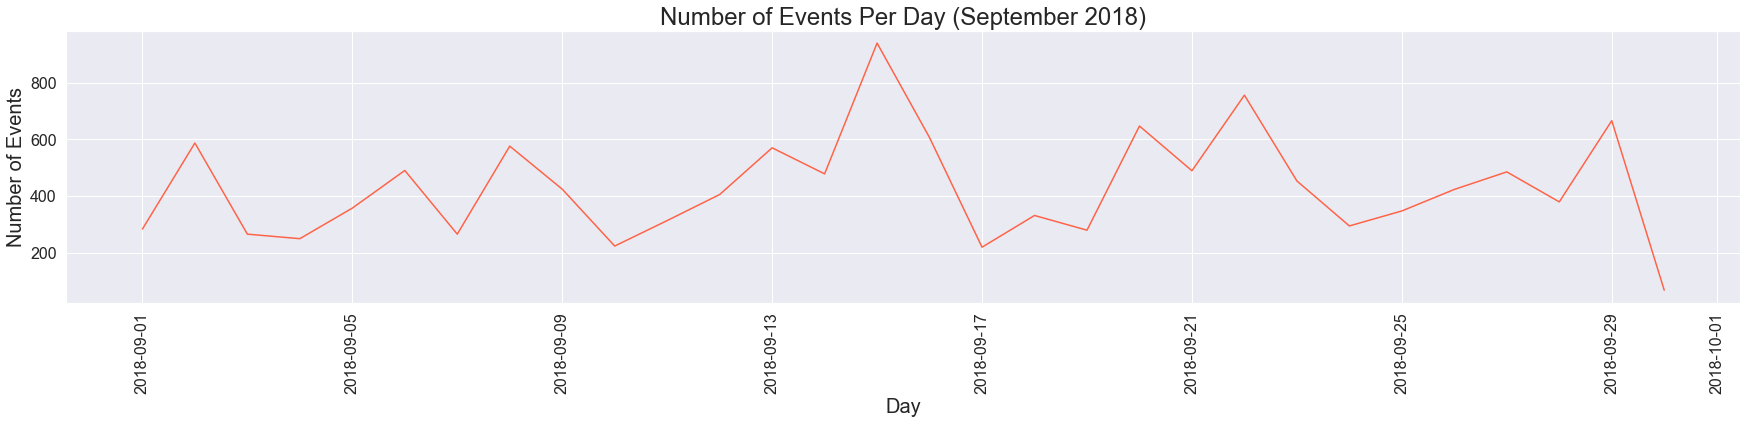

In [62]:
sns.set(style='darkgrid')
x = sep18_events['time_m_d_y'].value_counts().sort_index().index
y = sep18_events['time_m_d_y'].value_counts().sort_index()
plt.figure(figsize=(30,5)) 
l = sns.lineplot(x=x, y=y, color = 'tomato')
plt.title("Number of Events Per Day (September 2018)", fontsize = 24)
plt.xticks(rotation=90)
l.set_xlabel("Day", fontsize = 20)
l.set_ylabel("Number of Events", fontsize = 20)
l.tick_params(axis = 'both', labelsize = 16)

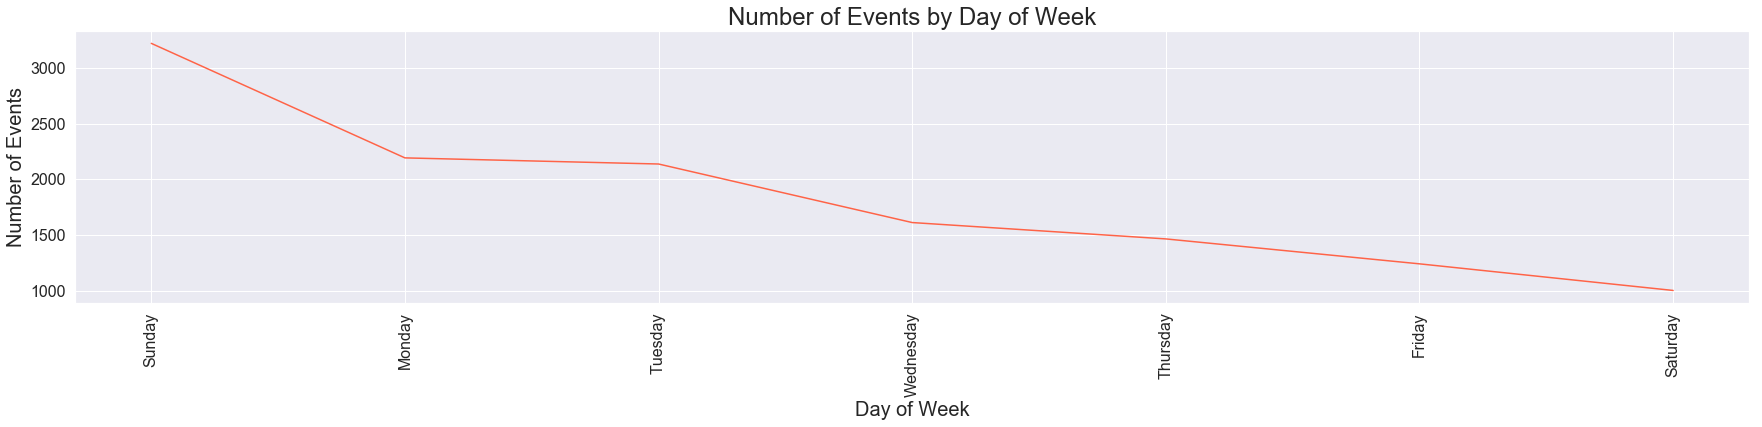

In [46]:
sns.set(style='darkgrid')
x = sep18_events['day_of_week'].value_counts().sort_index().index
days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
y = sep18_events['day_of_week'].value_counts()
plt.figure(figsize=(30,5)) 
l = sns.lineplot(x=x, y=y, color = 'tomato')
plt.title("Number of Events by Day of Week", fontsize = 24)
plt.xticks(rotation=90)
plt.xticks(range(len(y)), days)
l.set_xlabel("Day of Week", fontsize = 20)
l.set_ylabel("Number of Events", fontsize = 20)
l.tick_params(axis = 'both', labelsize = 16)

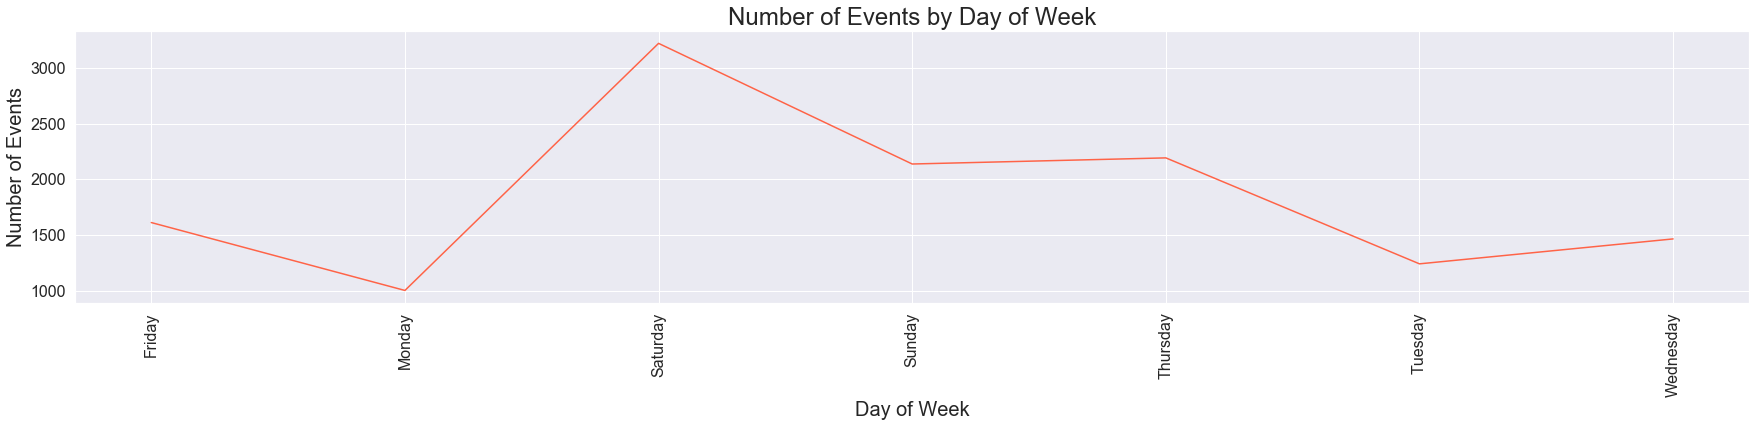

In [45]:
sns.set(style='darkgrid')
x = sep18_events['day_of_week'].value_counts().sort_index().index
y = sep18_events['day_of_week'].value_counts().sort_index()
plt.figure(figsize=(30,5)) 
l = sns.lineplot(x=x, y=y, color = 'tomato')
plt.title("Number of Events by Day of Week", fontsize = 24)
plt.xticks(rotation=90)

l.set_xlabel("Day of Week", fontsize = 20)
l.set_ylabel("Number of Events", fontsize = 20)
l.tick_params(axis = 'both', labelsize = 16)

In [57]:
# merge groups and events to get num_members, num_past_events
sep18_events[['description', 'name','group_id', 'headcount','maybe_rsvp_count', 'yes_rsvp_count', 'rsvp_limit']]

,description,name,group_id,headcount,maybe_rsvp_count,yes_rsvp_count,rsvp_limit
0,Join us in person or tune in online! Livestrea...,"JavaScript The Easier Parts: Objects, Function...",21993357,0,0,42,N/A
1,Get started now on challenges related to these...,Online Only JavaScript - The Hard Parts: Itera...,21993357,0,0,64,N/A
10,Please tune into the stream here: https://zoom...,Codesmith Online Info Session (Online Only),21993357,0,0,17,N/A
100,Note: this event will be Livestreamed here: ht...,Livestream: Virtual Bootcamp Info Session,15473572,0,0,26,N/A
1000,Free Admission exclusively for this meetup gro...,"FREE TIX, NO Drink min at Black Cat Cafe Comed...",1192681,0,0,9,N/A
10000,*PAY ONLINE - https://dljparty.ticketleap.com/...,"End Of Summer Party (Comp Apps, Drink Specials...",9673922,0,0,26,N/A
10001,*PAY ONLINE (Prepay Only Event) - https://dljp...,Friends TV Trivia... How YOU doing??,9673922,0,0,26,N/A
10002,*Purchase At - https://dljparty.ticketleap.com...,"Mix & Mingle Happy Hour (Comp Apps, Drink Spec...",9673922,0,0,26,N/A
10003,*PURCHASE AT - https://bit.ly/2xz819j*PREPAY O...,"""Summer Never Ends"" Yacht Party Cruise",9673922,0,0,26,N/A
10004,*Pay Online - https://dljparty.ticketleap.com/...,Paint Your Pet In Central Park!,9673922,0,0,21,N/A


In [52]:
sep18_events.columns

Index(['created', 'description', 'duration_min', 'event_url', 'fee',
       'headcount', 'id', 'maybe_rsvp_count', 'name', 'photo_url', 'rating',
       'rsvp_limit', 'status', 'time', 'updated', 'visibility',
       'waitlist_count', 'yes_rsvp_count', 'venue_neighborhood',
       'venue_latlon', 'venue_country', 'venue_id', 'group_id', 'time_m_d_y',
       'day_of_week', 'subway_distances', 'num_close_subways'],
      dtype='object')

***
### Groups

#### What types of groups are in NYC?

There are 34 categories of groups. Tech, career/business, and socializing are the most popular categories (i.e. most number of groups). Paranormal, None and cars/motorcycles are the least popular categories in NYC.

In [24]:
# getting back all_events:
df_groups = pd.read_csv('all_groups_cleaned.csv', index_col = 0)
df_groups.head()

,created,description,id,join_mode,lat,link,localized_country_name,localized_location,lon,members,...,state,status,urlname,visibility,who,category_id,category_name,organizer_id,days_since_created,created_date
0,1484876702000,Build with Code hosts free weekly JavaScript a...,21993357,open,40.75,https://www.meetup.com/Build-with-Code-New-York/,USA,"New York, NY",-73.99,8050,...,NY,active,Build-with-Code-New-York,public,Engineers,34.0,tech,218119162,831.093727,01/20/2017 01:45:02
1,1550615516000,The TechDay New York team invites you to join ...,31207091,open,40.75,https://www.meetup.com/TechDayHQ/,USA,"New York, NY",-73.99,1361,...,NY,active,TechDayHQ,public,Members,2.0,career-business,263284450,70.227824,02/19/2019 22:31:56
2,1047953152000,The NYC NoSQL NewSQL Group (formerly known a...,107592,open,40.75,https://www.meetup.com/mysqlnyc/,USA,"New York, NY",-73.99,24226,...,NY,active,mysqlnyc,public,Data Enthusiasts,34.0,tech,6618661,5888.079259,03/18/2003 02:05:52
3,1548684384000,The Awesome Events Meetup Group is the real-li...,31031999,open,40.78,https://www.meetup.com/awesome-events/,USA,"New York, NY",-73.96,1694,...,NY,active,awesome-events,public,Awesome People,23.0,outdoors-adventure,236287112,92.578889,01/28/2019 14:06:24
4,1321563802000,"Data Driven NYC (organized by FirstMark), is a...",2829432,approval,40.76,https://www.meetup.com/DataDrivenNYC/,USA,"New York, NY",-73.97,17382,...,NY,active,DataDrivenNYC,public,Members,34.0,tech,2369792,2721.289329,11/17/2011 21:03:22


In [125]:
print(f"Types of categories: {df_groups.category_name.unique()}")
print("\n")
print(f"Number of categories: {len(df_groups.category_name.unique())}")

Types of categories: ['tech' 'career-business' 'outdoors-adventure' 'language' 'arts-culture'
 'lgbt' 'fitness' 'socializing' 'support' 'sports-recreation'
 'photography' 'food-drink' 'writing' 'sci-fi-fantasy' 'games'
 'new-age-spirituality' 'education-learning' 'health-wellbeing' 'dancing'
 'lifestyle' 'cars-motorcycles' 'religion-beliefs' 'hobbies-crafts'
 'community-environment' 'music' 'parents-family' 'government-politics'
 'movies-film' 'singles' 'fashion-beauty' 'book-clubs' 'pets-animals'
 'paranormal' 'None']


Number of categories: 34


In [134]:
# add for years each group has been around
df_groups['years_since_created']=df_groups.days_since_created.apply(lambda x: x/365)

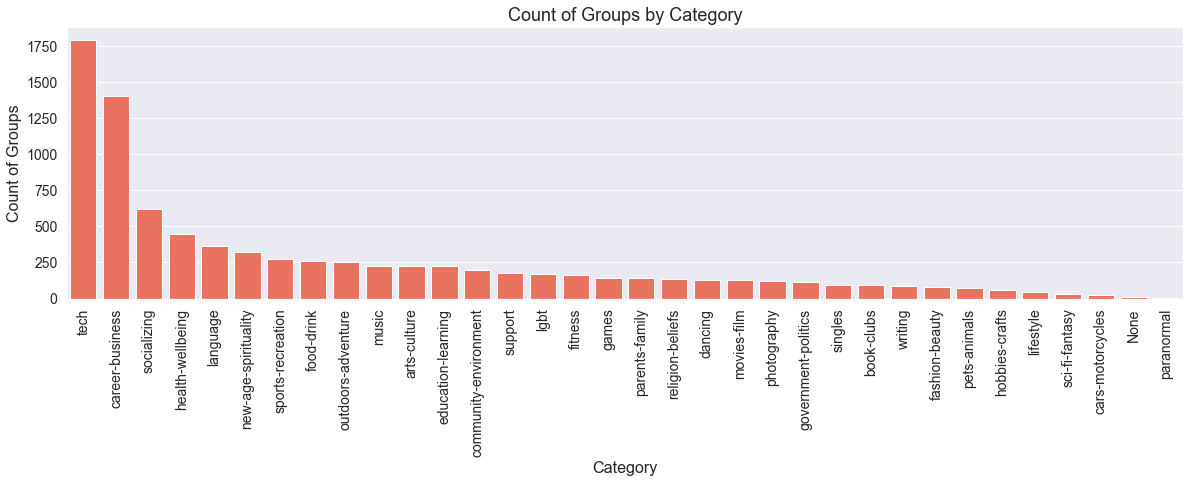

In [131]:
sns.set(style="darkgrid")
plt.figure(figsize=(20,5)) 
plt.title("Count of Groups by Category", fontsize = 18)
plt.xticks(rotation=90)
c = sns.countplot(df_groups.category_name, color = 'tomato', order = df_groups.category_name.value_counts().index)
c.set_xlabel("Category", fontsize = 16)
c.set_ylabel("Count of Groups", fontsize = 16)
c.tick_params(axis = 'both', labelsize = 14)

#### What is the range of memberships in each category?

For most categories, there are a lot of outliers, indicating that perhaps within each category, there are only a handful of groups that are most popular and contain the most membership.

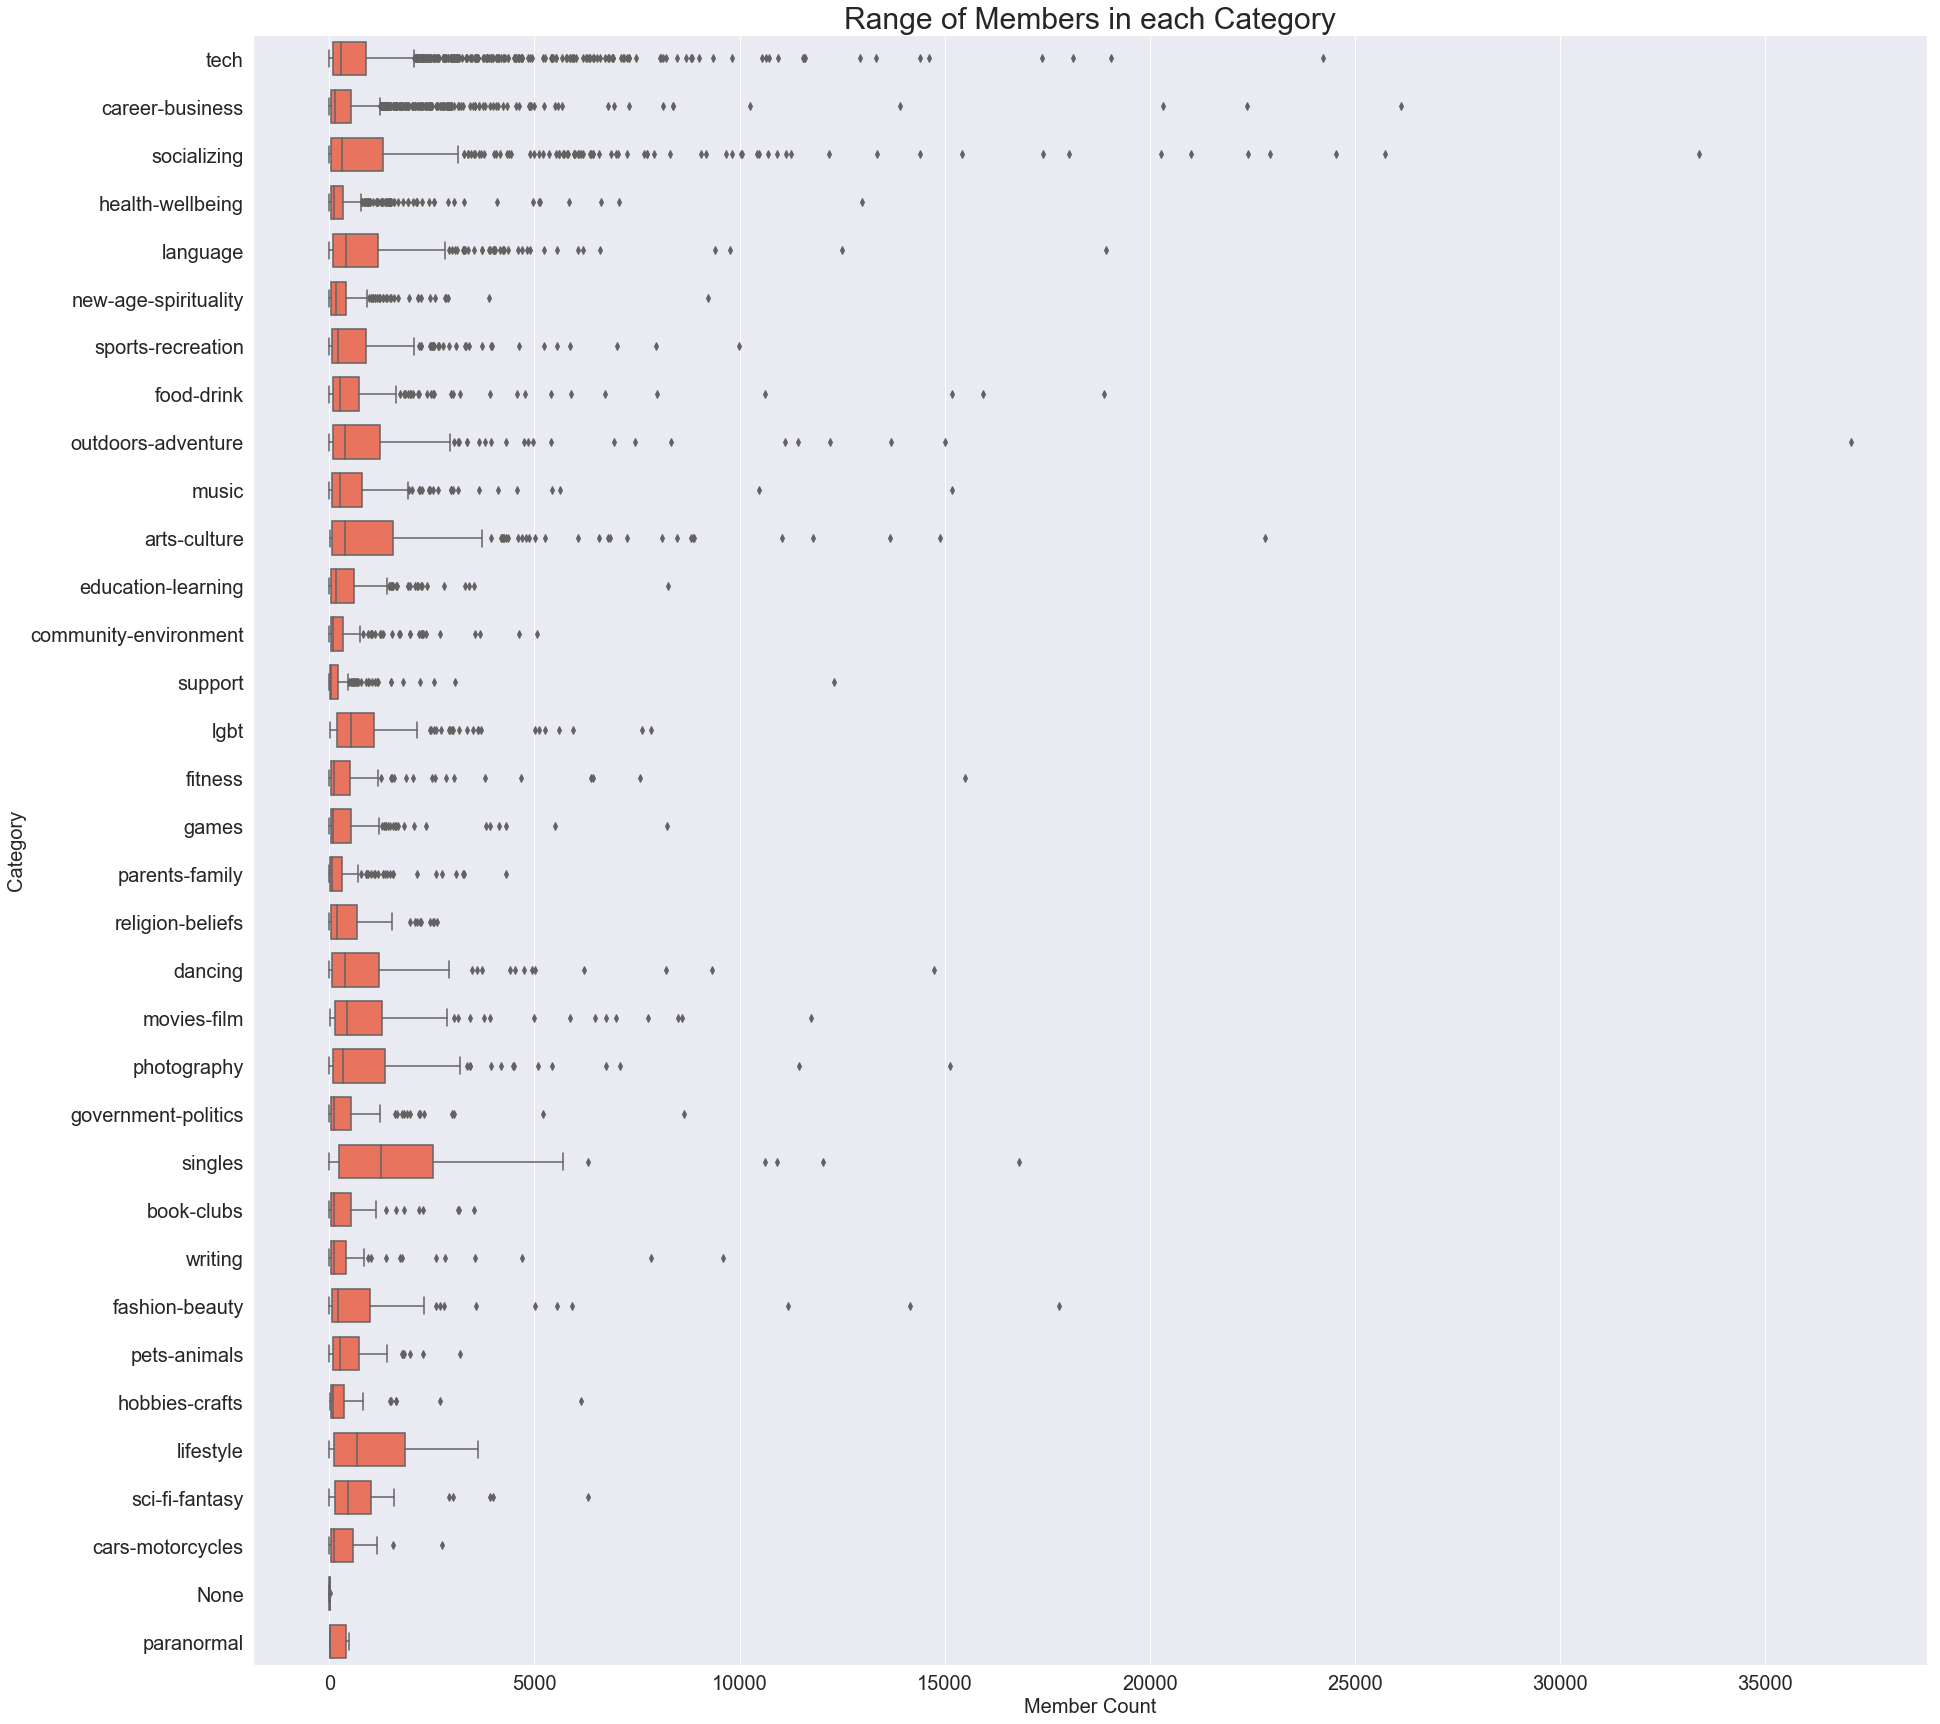

In [108]:
sns.set(style="darkgrid")
plt.figure(figsize=(30,30)) 
plt.title("Range of Members in each Category", fontsize = 30)
bplot = sns.boxplot(y='category_name', x='members', 
                 data=df_groups, 
                 width=0.7,
                 color = 'tomato',
                 order = df_groups.category_name.value_counts().index,
                 orient = 'h')
bplot.set_xlabel("Member Count", fontsize = 20)
bplot.set_ylabel("Category", fontsize = 20)
bplot.tick_params(axis = 'both', labelsize = 20)

#### How long have groups been around by category?
Meetup was founded in June 2002, about 17 years ago today. There are a handful of groups that are still around today that were created back in the early days of meetup. A majority of groups however are between 0-8 years old as we can see by the interquartile range of each category below.

Some notable mentions: 
- <b>book-club</b> groups tend to be shorter lived
- <b>pets-animals</b> and <b>religion-beliefs</b> groups tend to stick around for longer

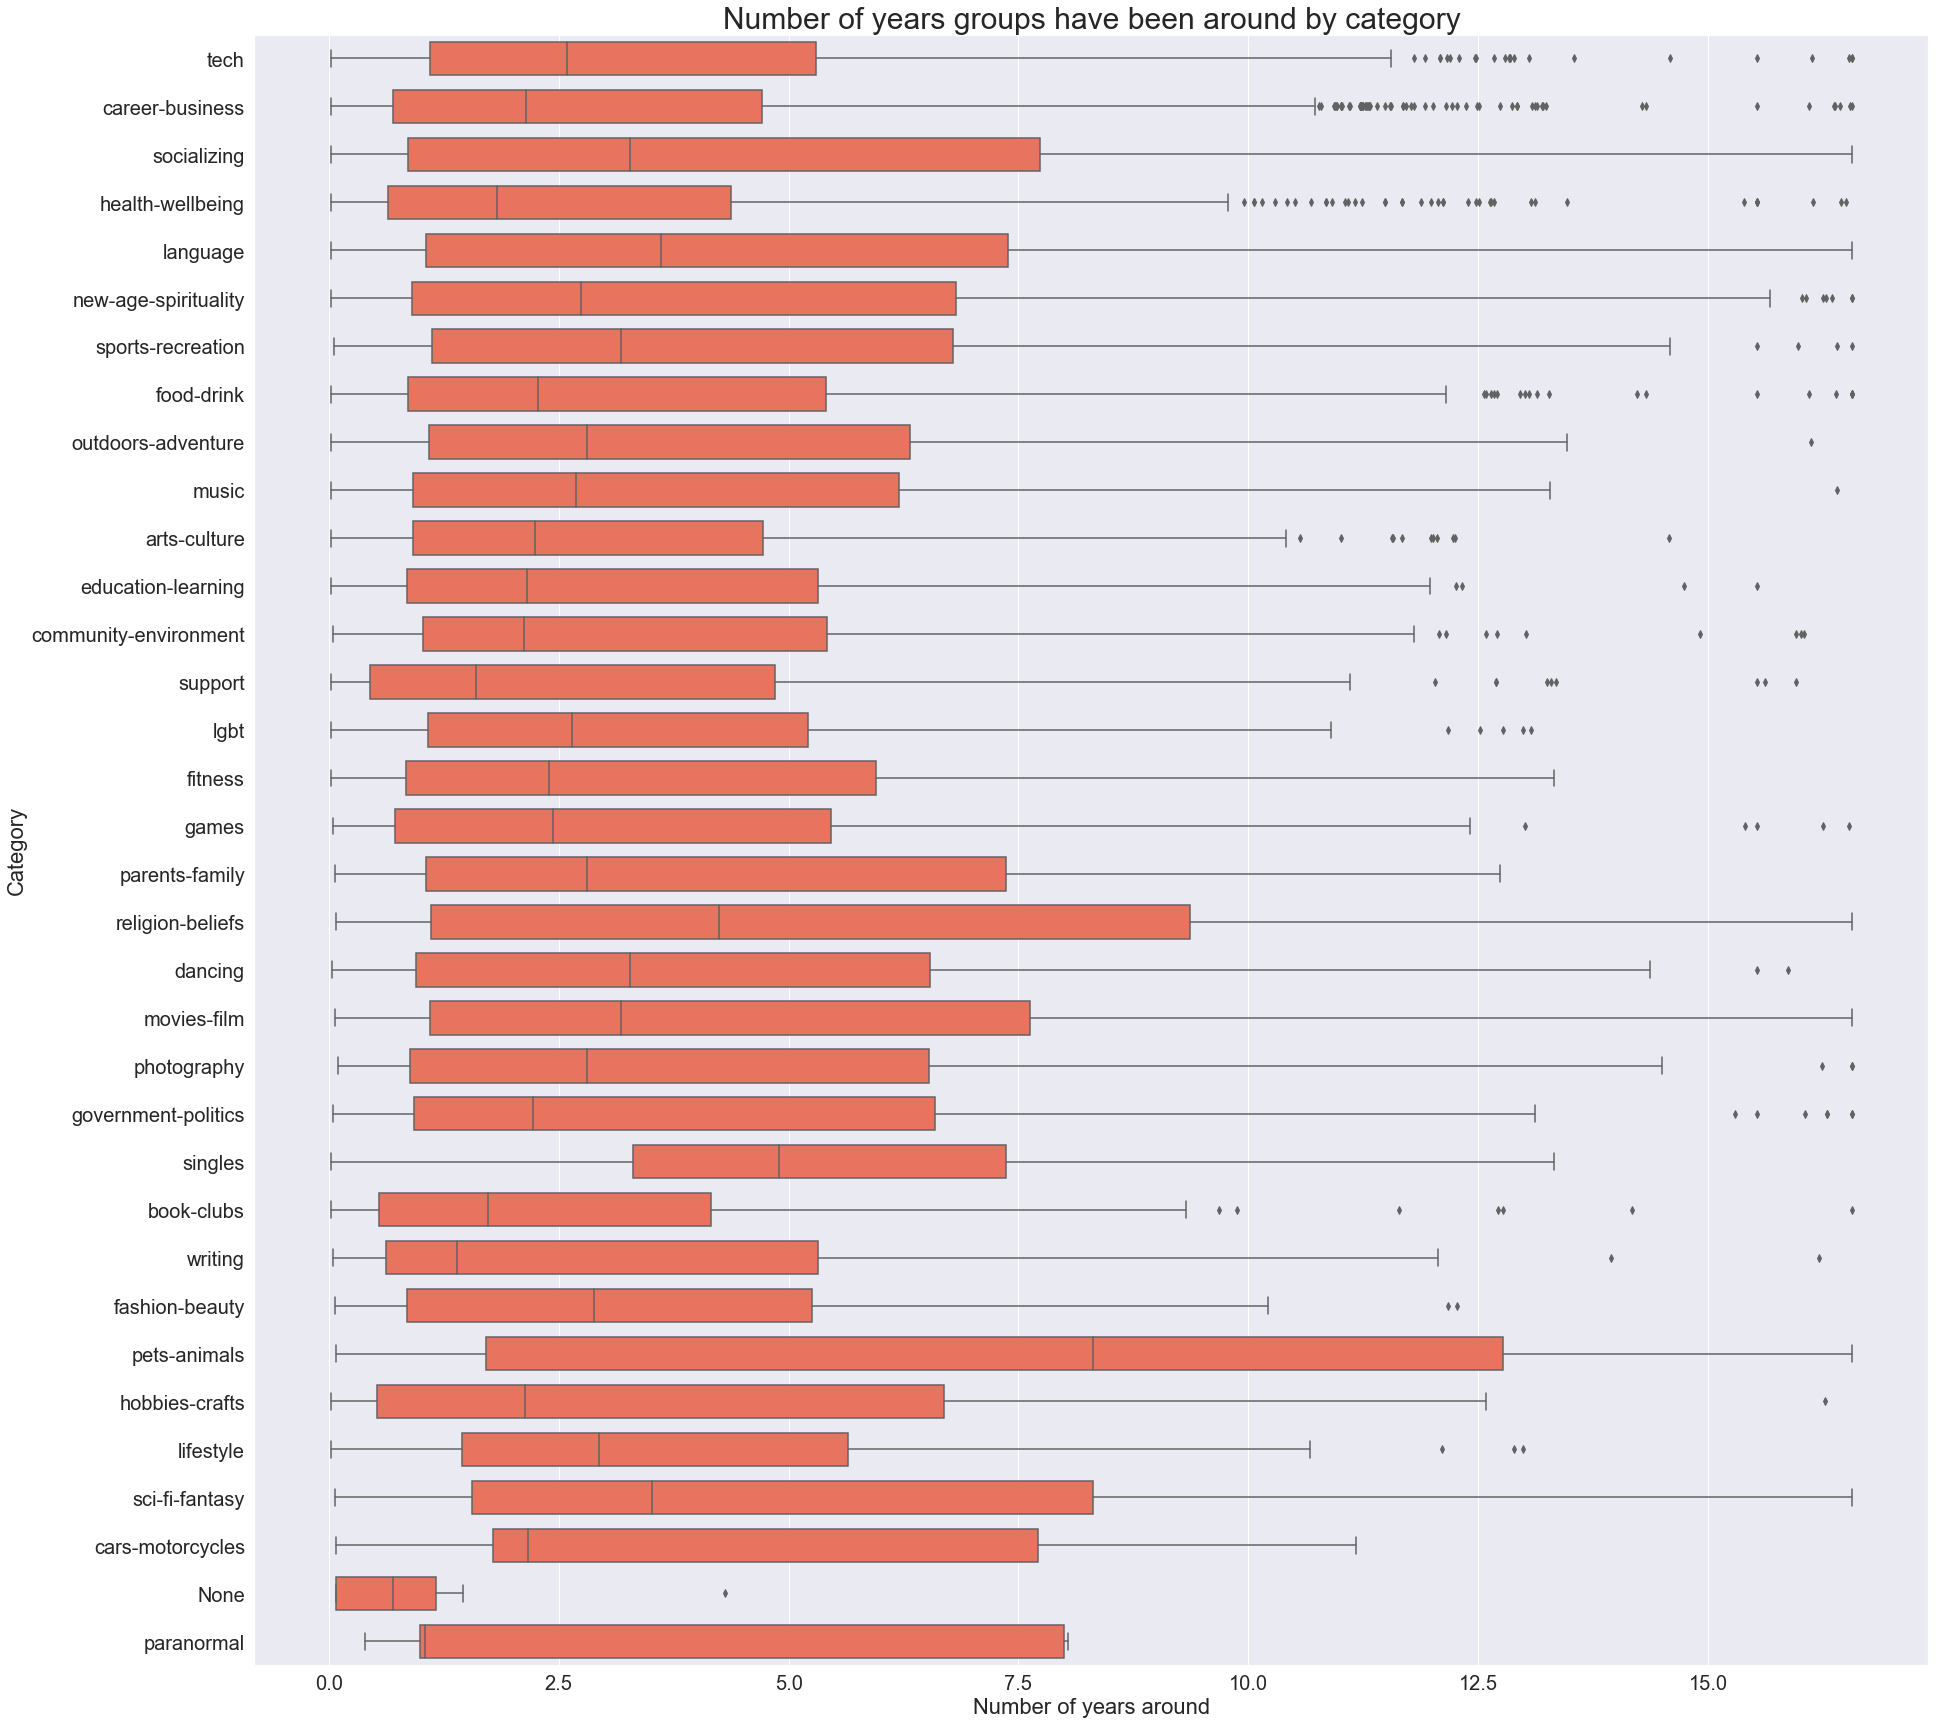

In [148]:
sns.set(style="darkgrid")
plt.figure(figsize=(30,30)) 
plt.title("Number of years groups have been around by category", fontsize = 30)
bplot = sns.boxplot(y='category_name', x='years_since_created', 
                 data=df_groups, 
                 width=0.7,
                 color = 'tomato',
                 order = df_groups.category_name.value_counts().index,
                 orient = 'h')
bplot.set_xlabel("Number of years around", fontsize = 22)
bplot.set_ylabel("Category", fontsize = 22)
bplot.tick_params(axis = 'both', labelsize = 20)

In [58]:
##  TO DO: plot number of past events held by category